In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from dataloader import load_data, visualize_images

# Load validation data
train_generator, test_generator = load_data()
test_images, test_labels = next(test_generator)

Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [13]:
# Load models
augmented_model = load_model('augmented_model.h5')
mobilenetV2_model = load_model('mobilenetV2_model.h5')
mobilenet_model = load_model('mobilenet_model.h5')

In [14]:
# Get predictions for each model
predictions_augmented = augmented_model.predict(test_images)
predictions_mobilenetV2 = mobilenetV2_model.predict(test_images)
predictions_mobilenet = mobilenet_model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [15]:
# Calculate ROC curves and AUC for each model
fpr_augmented, tpr_augmented, _ = roc_curve(test_labels, predictions_augmented)
auc_augmented = auc(fpr_augmented, tpr_augmented)

fpr_mobilenetV2, tpr_mobilenetV2, _ = roc_curve(test_labels, predictions_mobilenetV2)
auc_mobilenetV2 = auc(fpr_mobilenetV2, tpr_mobilenetV2)

fpr_mobilenet, tpr_mobilenet, _ = roc_curve(test_labels, predictions_mobilenet)
auc_mobilenet = auc(fpr_mobilenet, tpr_mobilenet)

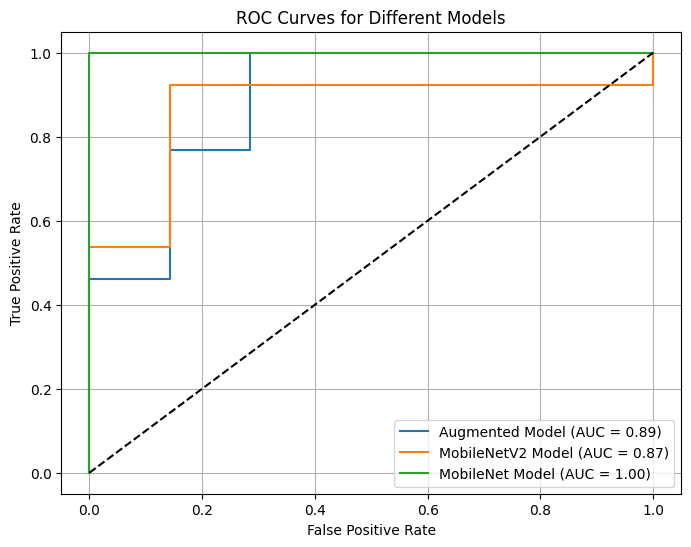

In [16]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_augmented, tpr_augmented, label=f'Augmented Model (AUC = {auc_augmented:.2f})')
plt.plot(fpr_mobilenetV2, tpr_mobilenetV2, label=f'MobileNetV2 Model (AUC = {auc_mobilenetV2:.2f})')
plt.plot(fpr_mobilenet, tpr_mobilenet, label=f'MobileNet Model (AUC = {auc_mobilenet:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()